In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('medical_examination.csv')
#read the provided CSV file

In [3]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


Here we are just trying to get a basic look at the data. Using df.head() we can get a feel for the different columns and their corresponding values.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   sex          70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


df.info() is very useful to get a good look at the structure of our data. Here we can spot irregularities and check wether we need to fill in any empty values. Since all columns have 70000 non-null entries, that does not seem to be the case.

In [31]:
df["overweight"] = df["weight"]/((df["height"]/100)*(df["height"]/100))
#calculate bmi of the people by dividing weight in kg by square of height in m
df.loc[df["overweight"] > 25, "overweight"] = 1
df.loc[df["overweight"] != 1, "overweight"] = 0
#generating a new column "overweight" based on the calculated bmi

As requested in the FCC-Project-Task we have generated a new column named "overweight". To do this we calculated the BMI of each individual and gave "overweight" the value of 1, if the person is considered to be overweight by BMI-standards ( >25) and 0 if the person is considered to be in the normal range. Note that:
1. BMI is not a good tool to measure wether people are overweight or not.
2. Having a BMI of 2 is just as bad. The lower ranges are considered "good" here, which is not necessarily true.

In [8]:
df.head()
#look at the column and wether the values make any kind of sense

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0.0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1.0
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0.0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1.0
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0.0


In [9]:
df.loc[df["cholesterol"] == 1, "cholesterol"] = 0
df.loc[df["cholesterol"] > 1, "cholesterol"] = 1
#normalizing data to 1=bad and 0=good

In [11]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,1,0,0,1,0,0.0
1,1,20228,1,156,85.0,140,90,1,1,0,0,1,1,1.0
2,2,18857,1,165,64.0,130,70,1,1,0,0,0,1,0.0
3,3,17623,2,169,82.0,150,100,0,1,0,0,1,1,1.0
4,4,17474,1,156,56.0,100,60,0,1,0,0,0,0,0.0


In [12]:
df.loc[df["gluc"]  == 1, "gluc"] = 0
df.loc[df["gluc"] > 1, "gluc"] = 1

In [13]:
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0.0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1.0
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0.0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1.0
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0.0


We normalized all of our "health" indicators by giving them the value 1 for bad and the value 0 for good.
Now having a 1 in the "cardio" column, would mean that he individual is suffering from heart-related diseases.
This normalization will help us later on to calculate the correlation between the different columns and their values.

In [14]:
cardf = df.melt(value_vars = ['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])

In [15]:
cardf = df.melt(id_vars = ['cardio'], value_vars = ['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])

In [16]:
cardf = pd.DataFrame(data=cardf.value_counts(), columns=['total']).sort_index().reset_index()

In [17]:
import seaborn as sb
cardf

,cardio,variable,value,total
0,0,active,0.0,6378
1,0,active,1.0,28643
2,0,alco,0.0,33080
3,0,alco,1.0,1941
4,0,cholesterol,0.0,29330
5,0,cholesterol,1.0,5691
6,0,gluc,0.0,30894
7,0,gluc,1.0,4127
8,0,overweight,0.0,15915
9,0,overweight,1.0,19106


In [33]:
#how does catplot work? pass the x variable which is the name of the column, pass in y as total as that is the name of the total column
#the hue differentiates the values 
#the column that we want to plot with is cardio
#then the data as data=cardf
#then kind to specify bar
chart = sb.catplot(x='variable', y = 'total', hue='value', col='cardio', data=cardf, kind='bar')


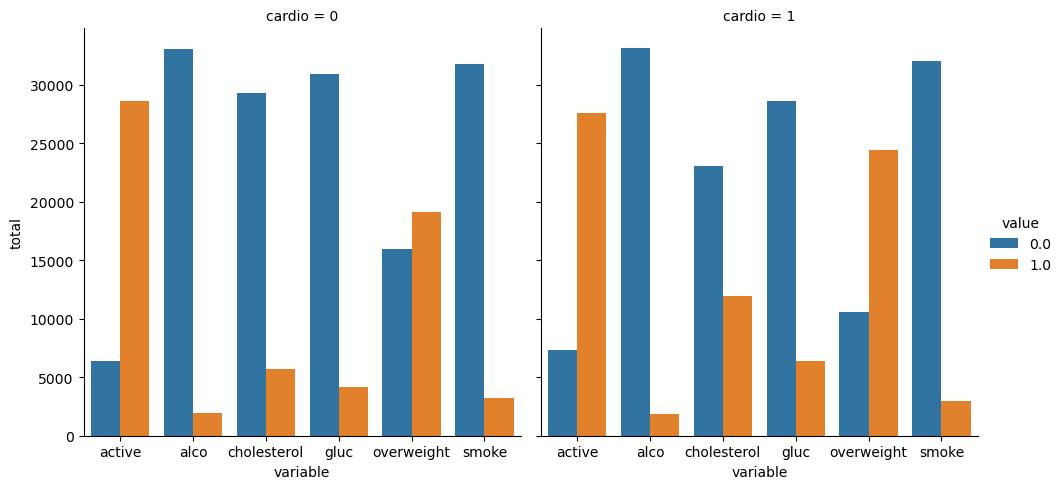

In [34]:
import matplotlib.pyplot as plt
plt.show()

What does this tell us?
We can see how the different diseases and metrics have some kind of relationship with each other. On the right side the plot "cardio =1" shows people who are suffering from heart-related issues. As we can see these people are more likely to be overweight, have bad/high cholesterol and be inactive. Interestingly the amount of individuals with a high activity level was more or less the same among the people who have no heart-related issues.


In [20]:
#now we need to clean the data according to the instructions
heatdf = df.loc[(df['ap_lo'] <= df['ap_hi']) &
               (df['height'] >= df['height'].quantile(0.025))&
               (df['height'] <= df['height'].quantile(0.975))&
               (df['weight'] >= df['weight'].quantile(0.025))&
               (df['weight'] <= df['weight'].quantile(0.975))]

We have cleaned some of the data. Instances where the " high dialotic pressure" was lower than the "low dialotic pressure" and instances where the "height" and "weight" metrics could be potentially wrong.

In [21]:
#correlation matrix
corr = heatdf.corr()

In [22]:
corr

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,1.000000,0.002507,0.003426,0.000326,0.000149,0.003492,0.000484,0.003719,0.002289,-0.002732,-0.000708,0.005891,0.003900,-0.000679
age,0.002507,1.000000,-0.018132,-0.076932,0.070168,0.018689,0.153508,0.129996,0.086990,-0.044371,-0.026970,-0.011445,0.240241,0.089573
sex,0.003426,-0.018132,1.000000,0.505785,0.129979,0.005063,0.059947,-0.037605,-0.021357,0.337436,0.168637,0.007864,0.002320,-0.052930
height,0.000326,-0.076932,0.505785,1.000000,0.251503,0.004586,0.017922,-0.063522,-0.030469,0.187830,0.089785,-0.005661,-0.024102,-0.149570
weight,0.000149,0.070168,0.129979,0.251503,1.000000,0.027030,0.227922,0.135981,0.107072,0.056533,0.059917,-0.014430,0.170042,0.655926
ap_hi,0.003492,0.018689,0.005063,0.004586,0.027030,1.000000,0.072803,0.022807,0.011111,-0.001928,0.000769,-0.000222,0.050556,0.017327
ap_lo,0.000484,0.153508,0.059947,0.017922,0.227922,0.072803,1.000000,0.150362,0.074840,0.023275,0.033042,0.001569,0.327181,0.172212
cholesterol,0.003719,0.129996,-0.037605,-0.063522,0.135981,0.022807,0.150362,1.000000,0.383743,0.012680,0.038446,0.002494,0.203467,0.127986
gluc,0.002289,0.086990,-0.021357,-0.030469,0.107072,0.011111,0.074840,0.383743,1.000000,-0.004157,0.014297,-0.010145,0.088445,0.088109
smoke,-0.002732,-0.044371,0.337436,0.187830,0.056533,-0.001928,0.023275,0.012680,-0.004157,1.000000,0.341200,0.026940,-0.020345,-0.003274


What is Correlation? Correlation describes the statistical relationship between two random variables. The df.corr() function from pandas uses the standard PPC-> "Pearson-Correlation Coefficient". Note that this only describes any linear relationship between two variables and ignores other types of statistical relations.

In [23]:
import numpy as np
#import numpy for np.triup function 
#source: https://www.geeksforgeeks.org/how-to-create-a-triangle-correlation-heatmap-in-seaborn-python/

In [24]:
#generate a triangular mask
trimask = np.triu(corr)

In [25]:
#create the matplotlib figure to display heatmap
fig,ax = plt.subplots(figsize=(12,6))

In [28]:
#using seaborn we plot a heatmap, for better visibility we chose to present 1 decimal after the comma
mapheat = sb.heatmap(corr, mask=trimask, annot=True, fmt='.1f' )

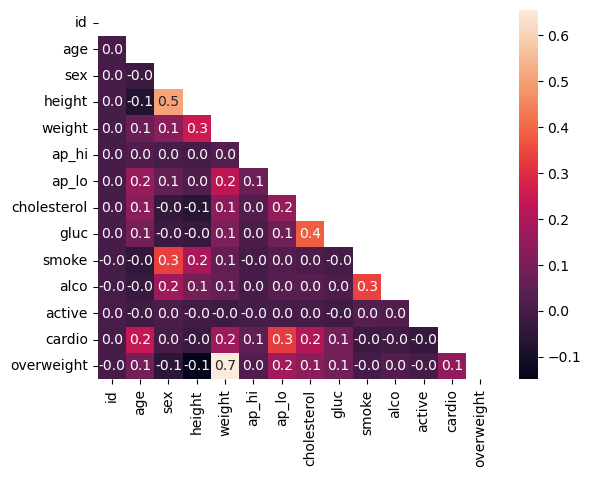

In [29]:
plt.show()
#looks better

Big Question: What does this tell us now?

Some findings:
1. Moderate linear Correlation between "glucose-Levels" and "cholesterol"
2. Obvious linear correlation between "weight" and "overweight"
3. Weak linear correlation between "cardio" and "age" as well as "ap_lo"(low diastolic pressure).